In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Helper Function

In [15]:
def pie_plot_total_emotions(df_morning, df_afternoon, title, neutral=True):
    labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
    
    if not neutral: 
        labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']
    
    sizes_afternoon = [df_afternoon.sum()[label] for label in labels]
    sizes_morning = [df_morning.sum()[label] for label in labels]

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    fig.suptitle(title)
    axs[0].pie(sizes_morning, labels=labels, autopct='%1.1f%%')
    axs[0].set_title('Morning')

    axs[1].pie(sizes_afternoon, labels=labels, autopct='%1.1f%%')
    axs[1].set_title('Afternoon')

In [32]:
def load_aggregate_hume_emotions(path):

    csv_files = glob.glob(path + "/*.csv")
    csv_files.sort()
    df_list = [pd.read_csv(file) for file in csv_files]
    time_deltas = np.cumsum([max(piece['time']) for piece in df_list[:-1]])
    time_deltas = np.insert(time_deltas, 0, 0)
    for df, delta in zip(df_list, time_deltas):
            
        df['time'] += delta

    df_org = pd.concat(df_list, ignore_index=True)



    # Emotion mapping 
    ANGER = ['Anger', 'Contempt', 'Determination', 'Envy']
    DISGUST = ['Awkwardness', 'Disgust', 'Embarrassment', 'Shame']
    ENJOYMENT = ['Admiration','Adoration','Aesthetic Appreciation','Amusement','Contentment','Ecstasy','Entrancement','Excitement','Interest','Joy','Love','Pride','Romance','Satisfaction','Triumph']
    FEAR = ['Anxiety','Awe','Desire','Distress','Doubt','Fear','Horror']
    NEUTRAL = ['Boredom','Calmness','Concentration','Contemplation', 'Sympathy', 'Tiredness']
    SADNESS = ['Confusion','Craving', 'Disappointment','Empathic Pain','Guilt','Nostalgia','Sadness','Pain']
    SURPRISE = ['Realization','Relief', 'Surprise (negative)','Surprise (positive)']

    df = pd.DataFrame(df_org[ANGER].mean(axis=1), columns=['anger'])
    df['disgust'] = df_org[DISGUST].mean(axis=1)
    df['fear'] = df_org[FEAR].mean(axis=1)
    df['joy'] = df_org[ENJOYMENT].mean(axis=1)
    df['sadness'] = df_org[SADNESS].mean(axis=1)
    df['surprise'] = df_org[SURPRISE].mean(axis=1)
    df['neutral'] = df_org[NEUTRAL].mean(axis=1)
    df['start_patch'] = np.floor(((df_org['time']/60)/5))*5
    df['start'] = df_org['time']


    return df

In [33]:
df_band_morning = load_aggregate_hume_emotions('../data/hume/raw_predictions/JFBB_Jazz_Funk_morning_video20230419101818 Luis Cal García_no_audio')
df_rhythm_morning = load_aggregate_hume_emotions('../data/hume/raw_predictions/JFBB_Rhythm_Section_Day1_Afternoon Thomas')
df_vocals_afternoon = load_aggregate_hume_emotions('../data/hume/raw_predictions/jazzaar-20230417-afternoon-JFLB-Cuban-Vocals-video Philipp')
df_vocals_morning = load_aggregate_hume_emotions('../data/hume/raw_predictions/jazzaar-20230417-morning-JFLB-Cuban-Vocals-video Philipp')

df_rhythm_morning.to_csv('../data/hume/processed/Funk_rhythm_morning.csv')
df_band_morning.to_csv('../data/hume/processed/Funk_band_morning.csv')
df_vocals_afternoon.to_csv('../data/hume/processed/Cuban_vocals_afternoon.csv')
df_vocals_morning.to_csv('../data/hume/processed/Cuban_vocals_morning.csv')


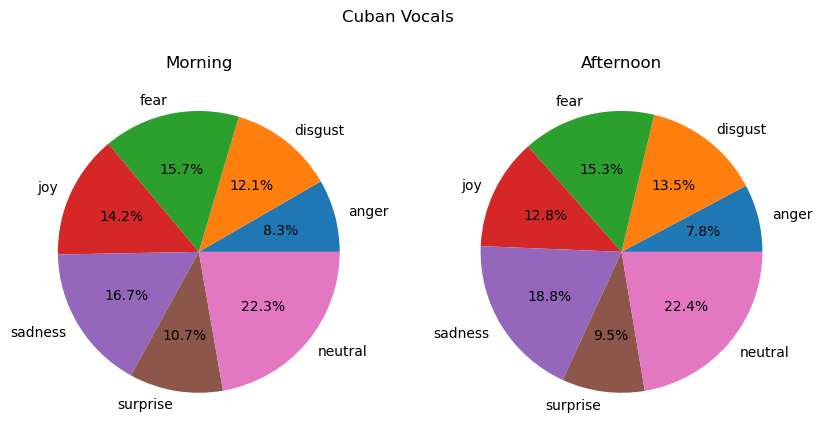

In [34]:
pie_plot_total_emotions(df_vocals_morning, df_vocals_afternoon, 'Cuban Vocals')